In [1]:
import pandas as pd 
df=pd.read_csv('2020_US_Region_Mobility_Report.csv')
df.loc[df.country_region_code=='US']
df[df.sub_region_1=='Washington']
df[df.sub_region_2=='King County']

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
765150,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0
765151,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0
765152,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0
765153,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0
765154,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765466,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-12-27,-41.0,-31.0,-14.0,-46.0,-17.0,9.0
765467,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-12-28,-30.0,-17.0,23.0,-58.0,-60.0,19.0
765468,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-12-29,-30.0,-15.0,2.0,-60.0,-60.0,21.0
765469,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-12-30,-31.0,-10.0,-17.0,-61.0,-60.0,21.0


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

In [24]:
# import package
from kats.consts import TimeSeriesData
from kats.detectors.robust_stat_detection import RobustStatDetector
import matplotlib

df = df.rename(columns={"date": "time", "workplaces_percent_change_from_baseline": "value"})
df = df[["time", "value"]]
df = df[df["time"] < '2020-04-01']
tsd = TimeSeriesData(df)



In [25]:
detector = RobustStatDetector(tsd)
change_points = detector.detector()

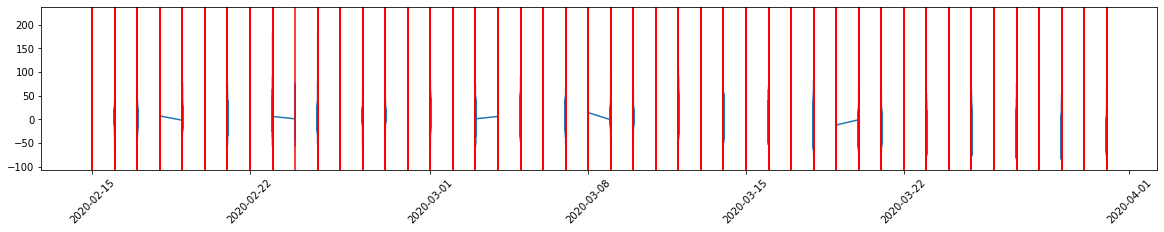

In [26]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()